In [1]:
#ch19_SparkSQL_01.ipynb

In [2]:
#1. 建立RDD

In [3]:
RawUserRDD=sc.textFile('u.user')

In [4]:
RawUserRDD.count() #共943筆

943

In [5]:
RawUserRDD.take(5) #查看前5筆, 資料是以 "|" 符號分隔

[u'1|24|M|technician|85711',
 u'2|53|F|other|94043',
 u'3|23|M|writer|32067',
 u'4|24|M|technician|43537',
 u'5|33|F|other|15213']

In [6]:
#以 "|"取得每一欄位

In [7]:
userRDD=RawUserRDD.map(lambda line:line.split("|"))
userRDD.take(5)    

[[u'1', u'24', u'M', u'technician', u'85711'],
 [u'2', u'53', u'F', u'other', u'94043'],
 [u'3', u'23', u'M', u'writer', u'32067'],
 [u'4', u'24', u'M', u'technician', u'43537'],
 [u'5', u'33', u'F', u'other', u'15213']]

In [8]:
#純以RDD API 解決問題

In [9]:
userRDD.map(lambda x:(x[2],1)).reduceByKey(lambda x,y:x+y).collect()

[(u'M', 670), (u'F', 273)]

In [10]:
#2. 建立DataFrame, 以RDD建立DataFrame

In [11]:
#Step2.1 建立sqlContext

In [12]:
from  pyspark.sql import SQLContext #匯入SQLContext module
sqlContext=SQLContext(sc) #使用SQLContext傳入sc(Spark Context),建立sqlContext

In [13]:
#step2.2 定義DataFrame 的 Schema, 使用pyspark.sql.Row 物件

In [14]:
from pyspark.sql import Row #import pyspark.sql.Row

In [15]:
#map into Row object
user_Rows=userRDD.map(lambda p:   
                     Row(
                            userid=int(p[0]),
                            age=int(p[1]),
                            gender=p[2],
                            occupation=p[3],
                            zipcode=p[4]))

In [16]:
user_Rows.take(5) #

[Row(age=24, gender=u'M', occupation=u'technician', userid=1, zipcode=u'85711'),
 Row(age=53, gender=u'F', occupation=u'other', userid=2, zipcode=u'94043'),
 Row(age=23, gender=u'M', occupation=u'writer', userid=3, zipcode=u'32067'),
 Row(age=24, gender=u'M', occupation=u'technician', userid=4, zipcode=u'43537'),
 Row(age=33, gender=u'F', occupation=u'other', userid=5, zipcode=u'15213')]

In [17]:
#Step2.3 建立 DataFrame 物件
#使用SQLContext.createDataFrame() method 將Row 物件 user_Rows 建成 DataFrame 物件 user_df

In [18]:
user_df=sqlContext.createDataFrame(user_Rows)

In [19]:
user_df.printSchema() #printSchema() method

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)



In [20]:
#以DataFrame.show() 查看 DataFrame 內容
user_df.show()

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 53|     F|        other|     2|  94043|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 33|     F|        other|     5|  15213|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
| 29|     M|      student|     9|  01002|
| 53|     M|       lawyer|    10|  90703|
| 39|     F|        other|    11|  30329|
| 28|     F|        other|    12|  06405|
| 47|     M|     educator|    13|  29206|
| 45|     M|    scientist|    14|  55106|
| 49|     F|     educator|    15|  97301|
| 21|     M|entertainment|    16|  10309|
| 30|     M|   programmer|    17|  06355|
| 35|     F|        other|    18|  37212|
| 40|     M|    librarian|    19|  02138|
| 42|     F|    homemaker|    20|  95660|
+---+------+-------------+------+-

In [21]:
#Step2.4 建立別名 ,DataFrame.alias() method

In [22]:
df=user_df.alias("df")
df.show()

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 53|     F|        other|     2|  94043|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 33|     F|        other|     5|  15213|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
| 29|     M|      student|     9|  01002|
| 53|     M|       lawyer|    10|  90703|
| 39|     F|        other|    11|  30329|
| 28|     F|        other|    12|  06405|
| 47|     M|     educator|    13|  29206|
| 45|     M|    scientist|    14|  55106|
| 49|     F|     educator|    15|  97301|
| 21|     M|entertainment|    16|  10309|
| 30|     M|   programmer|    17|  06355|
| 35|     F|        other|    18|  37212|
| 40|     M|    librarian|    19|  02138|
| 42|     F|    homemaker|    20|  95660|
+---+------+-------------+------+-

In [23]:
#3. 開始使用 Spark SQL

In [24]:
#Step3.1登錄暫存資料表
#以DataFrame.registerTempTable() method, 傳入table name, 登錄暫存資料表
df.registerTempTable("user_table")

In [25]:
#Step3.2 使用Spark SQL 查看筆數
sqlContext.sql("SELECT count(*) as counts FROM user_table").show()

+------+
|counts|
+------+
|   943|
+------+



In [26]:
#Step3.3 多行輸入Spark SQL ,””” SQL statement”””
sqlContext.sql("""
SELECT count(*) as counts
FROM user_table""").show()

+------+
|counts|
+------+
|   943|
+------+



In [27]:
#Step3.4 使用Spark SQL 檢視資料, show() default top 20
sqlContext.sql("SELECT * FROM user_table").show()

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 53|     F|        other|     2|  94043|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 33|     F|        other|     5|  15213|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
| 29|     M|      student|     9|  01002|
| 53|     M|       lawyer|    10|  90703|
| 39|     F|        other|    11|  30329|
| 28|     F|        other|    12|  06405|
| 47|     M|     educator|    13|  29206|
| 45|     M|    scientist|    14|  55106|
| 49|     F|     educator|    15|  97301|
| 21|     M|entertainment|    16|  10309|
| 30|     M|   programmer|    17|  06355|
| 35|     F|        other|    18|  37212|
| 40|     M|    librarian|    19|  02138|
| 42|     F|    homemaker|    20|  95660|
+---+------+-------------+------+-

In [28]:
sqlContext.sql("SELECT * FROM user_table").show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+
only showing top 5 rows



In [29]:
sqlContext.sql("SELECT * FROM user_table LIMIT 5").show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+



In [30]:
#4.Projection 欄位 (SELECT)
#比較RDD、DataFrames 與 Spark SQL

In [31]:
#Step4.1 使用RDD選取顯示部分欄位
userRDDnew=userRDD.map(lambda x:(x[0],x[3],x[1],x[2]))
userRDDnew.take(5)                       

[(u'1', u'technician', u'24', u'M'),
 (u'2', u'other', u'53', u'F'),
 (u'3', u'writer', u'23', u'M'),
 (u'4', u'technician', u'24', u'M'),
 (u'5', u'other', u'33', u'F')]

In [32]:
#Step4.2 使用DataFrames 選取顯示欄位, DataFrames.select()

In [33]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)



In [34]:
df.select("userid","gender","age").show(5) #方法1

+------+------+---+
|userid|gender|age|
+------+------+---+
|     1|     M| 24|
|     2|     F| 53|
|     3|     M| 23|
|     4|     M| 24|
|     5|     F| 33|
+------+------+---+
only showing top 5 rows



In [35]:
df.select(df.userid,df.gender,df.age).show(5) #方法2

+------+------+---+
|userid|gender|age|
+------+------+---+
|     1|     M| 24|
|     2|     F| 53|
|     3|     M| 23|
|     4|     M| 24|
|     5|     F| 33|
+------+------+---+
only showing top 5 rows



In [36]:
df.select(df['userid'],df['gender'],df['age']).show(5) #方法3

+------+------+---+
|userid|gender|age|
+------+------+---+
|     1|     M| 24|
|     2|     F| 53|
|     3|     M| 23|
|     4|     M| 24|
|     5|     F| 33|
+------+------+---+
only showing top 5 rows



In [37]:
#Step4.3 使用 Spark SQL 選取顯示欄位

In [38]:
sqlContext.sql("SELECT userid, gender,age FROM user_table").show()

+------+------+---+
|userid|gender|age|
+------+------+---+
|     1|     M| 24|
|     2|     F| 53|
|     3|     M| 23|
|     4|     M| 24|
|     5|     F| 33|
|     6|     M| 42|
|     7|     M| 57|
|     8|     M| 36|
|     9|     M| 29|
|    10|     M| 53|
|    11|     F| 39|
|    12|     F| 28|
|    13|     M| 47|
|    14|     M| 45|
|    15|     F| 49|
|    16|     M| 21|
|    17|     M| 30|
|    18|     F| 35|
|    19|     M| 40|
|    20|     F| 42|
+------+------+---+
only showing top 20 rows



In [ ]:
#5.增加計算欄位

In [39]:
#Step5.1 使用RDD增加計算欄位, 加上2017-int(x[1]) 計算出生年
userRDDnew=userRDD.map(lambda x:(x[0],x[3],x[2],x[1],2017-int(x[1])))
userRDDnew.take(5)

[(u'1', u'technician', u'M', u'24', 1993),
 (u'2', u'other', u'F', u'53', 1964),
 (u'3', u'writer', u'M', u'23', 1994),
 (u'4', u'technician', u'M', u'24', 1993),
 (u'5', u'other', u'F', u'33', 1984)]

In [40]:
#Step5.2 使用DataFrames , 並為欄位取別名 'birthyear'
df.select("userid","gender","age",(2017-df.age).alias("birthyear")).show(5)

+------+------+---+---------+
|userid|gender|age|birthyear|
+------+------+---+---------+
|     1|     M| 24|     1993|
|     2|     F| 53|     1964|
|     3|     M| 23|     1994|
|     4|     M| 24|     1993|
|     5|     F| 33|     1984|
+------+------+---+---------+
only showing top 5 rows



In [44]:
#Step5.3 使用 Spark SQL,並為欄位取別名 'birthyear'
sqlContext.sql("""
SELECT userid,gender,age,2017-age  birthyear 
FROM user_table""").show(5)

+------+------+---+---------+
|userid|gender|age|birthyear|
+------+------+---+---------+
|     1|     M| 24|     1993|
|     2|     F| 53|     1964|
|     3|     M| 23|     1994|
|     4|     M| 24|     1993|
|     5|     F| 33|     1984|
+------+------+---+---------+
only showing top 5 rows



In [45]:
#6.篩選資料

In [47]:
#Step6.1 使用RDD, filter() method 搭配lambda語法
userRDD.filter(lambda r: r[3]=='technician' and r[2]=='M').take(5)

[[u'1', u'24', u'M', u'technician', u'85711'],
 [u'4', u'24', u'M', u'technician', u'43537'],
 [u'44', u'26', u'M', u'technician', u'46260'],
 [u'77', u'30', u'M', u'technician', u'29379'],
 [u'143', u'42', u'M', u'technician', u'08832']]

In [48]:
#Step6.2 使用DataFrames, 有多種寫法

In [51]:
#方法1,使用多個filter()
df.filter("occupation='technician'").filter("gender='M'").show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 26|     M|technician|    44|  46260|
| 30|     M|technician|    77|  29379|
| 42|     M|technician|   143|  08832|
+---+------+----------+------+-------+
only showing top 5 rows



In [52]:
#方法2,使用單一filter
df.filter("occupation='technician' and gender='M'").show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 26|     M|technician|    44|  46260|
| 30|     M|technician|    77|  29379|
| 42|     M|technician|   143|  08832|
+---+------+----------+------+-------+
only showing top 5 rows



In [53]:
#方法3
df.filter((df.occupation=='technician')&(df.gender=='M')).show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 26|     M|technician|    44|  46260|
| 30|     M|technician|    77|  29379|
| 42|     M|technician|   143|  08832|
+---+------+----------+------+-------+
only showing top 5 rows



In [58]:
#Step6.3 使用Spark SQL
sqlContext.sql("""
select * 
from user_table
where occupation='technician' and gender='M'""").show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 26|     M|technician|    44|  46260|
| 30|     M|technician|    77|  29379|
| 42|     M|technician|   143|  08832|
+---+------+----------+------+-------+
only showing top 5 rows



In [59]:
import pandas as pd

In [60]:
pd_df=df.toPandas().set_index('userid')

In [61]:
import matplotlib as plt

In [62]:
%matplotlib inline  

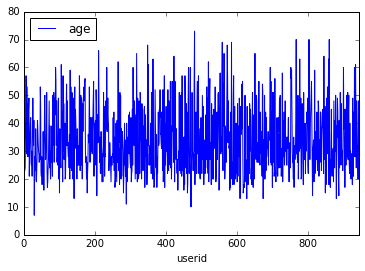

In [63]:
pd_df.plot()